In [ ]:
# process the vcf file into the momi style format
# python -m momi.read_vcf /home/chichi/data2/chichi/typha_lax/admix2/126_raw_filter_variants_maf0.01_miss0.9.vcf pop_txt momi.step1

In [1]:
import momi
import logging

logging.basicConfig(level=logging.INFO,filename="tutorial26.log")
#sfs = momi.SnpAlleleCounts.load("/home/chichi/data2/chichi/typha_lax/momi/126_raw_filter_variants_snp.vcf") 
#vcf = momi.SnpAlleleCounts.read_vcf("/home/chichi/data2/chichi/typha_lax/momi/126_raw_filter_variants_snp.vcf", "/home/chichi/data2/chichi/typha_lax/momi/pop_txt", bed_file = None, ancestral_alleles=False)
#sfs = momi.sfs_from_dadi("/home/chichi/data2/chichi/typha_lax/momi/126_raw_filter_variants_snp.vcf.gz.data", "/home/chichi/data2/chichi/typha_lax/momi/126_raw_filter_variants_snp.vcf.gz.data2")
sfs = momi.Sfs.load("/home/chichi/data2/chichi/typha_lax/momi/momi_step3_2")
model = momi.DemographicModel(N_e=1e5, gen_time=1, muts_per_gen=5.14e-6)
model.set_data(sfs,221000)

In [2]:
# add the leaf at the t= 0
# note:
# China CN_SC
# TL05 USA_PA2
# Canada CA_ON
# TL01 USA_PA1
# TL17 USA_CA

model.add_leaf("N4", N=4e5)
model.add_leaf("N3", N=4e5)
model.add_leaf("N2", N=4e5)
model.add_leaf("N1", N=4e5)
model.add_leaf("S", N=4e5)

In [3]:

# add the evolution relationship
model.move_lineages("N1", "N4", t="t_split_N1_N4",N="N_N1A")
model.move_lineages("N2", "N1", t="t_split_N2_N1",N="N_N2A")
model.move_lineages("N3", "N1", t="t_split_N3_N1",N="N_N3A")
model.move_lineages("S", "N2", t="t_split_S_N2",N="N_SA")


In [4]:
# add the migration
#model.move_lineages("S", "N2", t="t_mig_S_N2", p="p_mig_S_N2")
model.move_lineages("N2", "N1", t="t_mig_N2_N1", p="p_mig_N2_N1")
model.move_lineages("N3", "N1", t="t_mig_N3_N1", p="p_mig_N3_N1")
model.move_lineages("N4", "N1", t="t_mig_N4_N1", p="p_mig_N4_N1")
model.move_lineages("N4", "N2", t="t_mig_N4_N2", p="p_mig_N4_N2")
model.move_lineages("N4", "N3", t="t_mig_N4_N3", p="p_mig_N4_N3")
model.move_lineages("N3", "N2", t="t_mig_N3_N2", p="p_mig_N3_N2")
#model.move_lineages("N1", "S", t="t_mig_N1_S", p="p_mig_N1_S")

In [5]:
# Add the intitial guess for the parameters
model.add_size_param("N_N4A", lower=1e4, upper=1e6)
model.add_time_param("t_split_N4_N1", lower=7.6e4, upper=1e5)

model.add_size_param("N_N2A", lower=1e6, upper=1e8)
model.add_time_param("t_split_N2_N1", lower=7e4, upper=7.5e4)

model.add_size_param("N_N3A", lower=1e6, upper=1e8)
model.add_time_param("t_split_N3_N1", lower=2.5e4, upper=4e4)

model.add_size_param("N_SA", lower=1e6, upper=1e8)
model.add_time_param("t_split_S_N2", lower=5e4, upper=6.95e4)

In [6]:
# Add the migration parameters
#model.add_pulse_param("p_mig_S_N2", lower=0, upper=1) # p < 0.01
model.add_pulse_param("p_mig_N2_N1", lower=0.72, upper=0.735)
model.add_pulse_param("p_mig_N3_N1", lower=0.28, upper=0.30)
model.add_pulse_param("p_mig_N4_N1", lower=0.78, upper=0.79)
model.add_pulse_param("p_mig_N4_N2", lower=0.71, upper=0.73)
model.add_pulse_param("p_mig_N4_N3", lower=0.78, upper=0.79)
model.add_pulse_param("p_mig_N3_N2", lower=0.53, upper=0.54)
#model.add_pulse_param("p_mig_N1_S", lower=0, upper=1) # p < 0.01
# add the migration time parameters
#model.add_time_param("t_mig_S_N2", lower=0, upper=3e4)
model.add_time_param("t_mig_N2_N1", lower=19000, upper=20000)
model.add_time_param("t_mig_N3_N1", lower=29000, upper=31000)
model.add_time_param("t_mig_N4_N1", lower=13000, upper=14000)
model.add_time_param("t_mig_N4_N2", lower=6000, upper=7000)
model.add_time_param("t_mig_N4_N3", lower=14000, upper=15000)
model.add_time_param("t_mig_N3_N2", lower=25000, upper=26000)
#model.add_time_param("t_mig_N1_S", lower=0, upper=3e4)



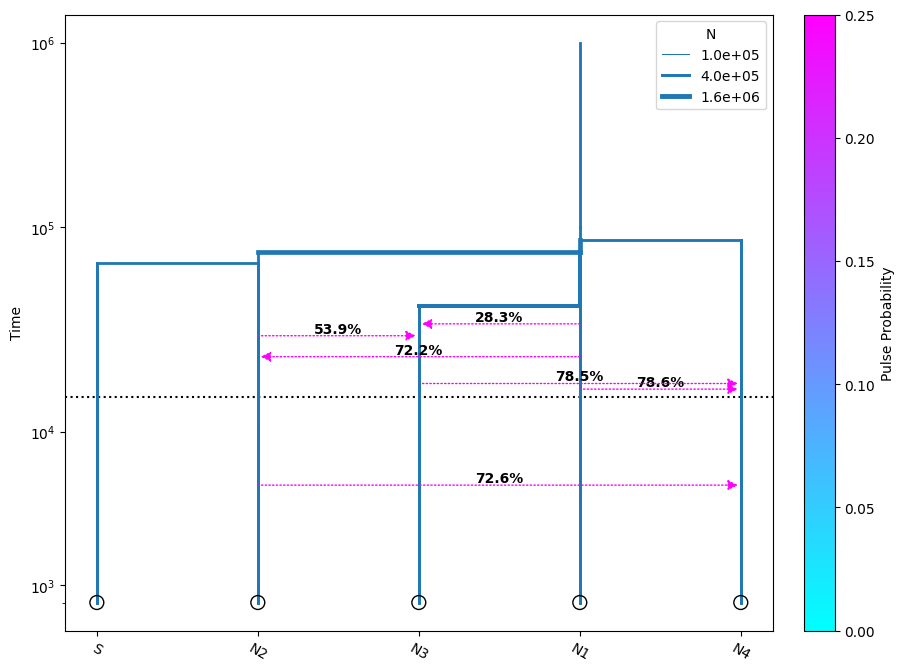

In [7]:
yticks = [1e3, 1e4, 1e5, 1e6]
fig = momi.DemographyPlot(
    model, ["S", "N2", "N3", "N1", "N4"],
    figsize=(10,8),
    major_yticks=yticks,
    linthreshy=12e3, pulse_color_bounds=(0,0.25))

In [ ]:
    results = []
    model_copy = model.copy()
    model_copy.set_params(model.get_params(),randomize=True)
    results.append(model_copy.optimize(method="L-BFGS-B"),options={'maxiter': 2,"ftol":1e-7})